# Practical 12: Write a program to understand how retailer use location analytics to analyze foot traffic patterns and optimize store placement.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/dataset.csv")

In [ ]:
df

,Store ID,Timestamp,Visitor Count,Weather Condition,Day of Week,Season,Special Event,Store Type,Store Location,Retail Area,Holiday
0,Store_3,2024-11-01 09:00:00,48,Cloudy,Friday,Autumn,NaN,Electronics,Ground Floor,Large,No
1,Store_8,2024-11-01 10:00:00,80,Sunny,Friday,Autumn,Holiday Promotion,Umbrella & Rainwear,Ground Floor,Large,No
2,Store_4,2024-11-01 11:00:00,57,Rainy,Friday,Autumn,Holiday Promotion,Clothing,Ground Floor,Large,No
3,Store_19,2024-11-01 12:00:00,32,Sunny,Friday,Autumn,NaN,Footwear,Ground Floor,Medium,No
4,Store_3,2024-11-01 13:00:00,25,Cloudy,Friday,Autumn,NaN,Umbrella & Rainwear,Near Food Court,Small,No
...,...,...,...,...,...,...,...,...,...,...,...
95,Store_8,2024-11-05 08:00:00,45,Sunny,Tuesday,Autumn,NaN,Footwear,First Floor,Small,No
96,Store_19,2024-11-05 09:00:00,65,Rainy,Tuesday,Autumn,NaN,Umbrella & Rainwear,Near Food Court,Small,No
97,Store_11,2024-11-05 10:00:00,31,Cloudy,Tuesday,Autumn,NaN,Umbrella & Rainwear,Second Floor,Large,No
98,Store_12,2024-11-05 11:00:00,71,Sunny,Tuesday,Autumn,Sale,Groceries,First Floor,Medium,No


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

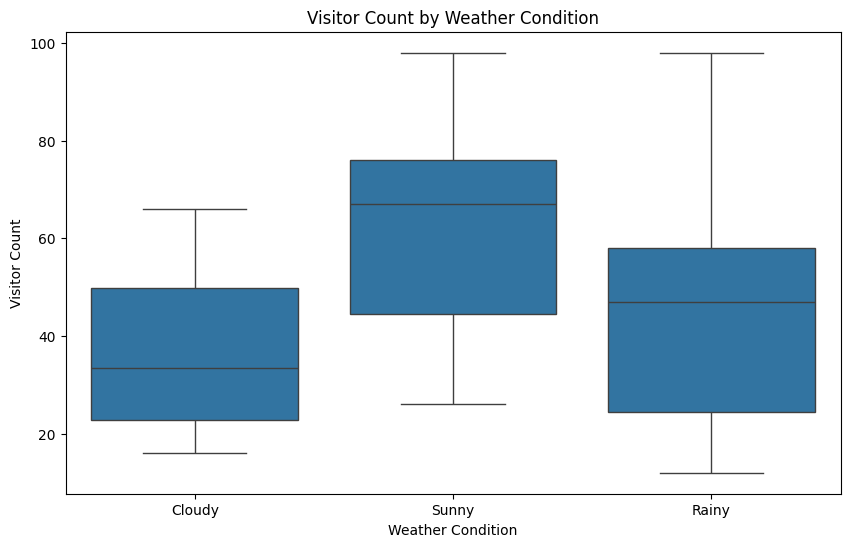

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Condition', y='Visitor Count', data=df)
plt.title('Visitor Count by Weather Condition')
plt.show()

In [ ]:
data_encoded = df.copy()
data_encoded['Weather Condition'] = df['Weather Condition'].astype('category').cat.codes
data_encoded['Day of Week'] = df['Day of Week'].astype('category').cat.codes
data_encoded['Season'] = df['Season'].astype('category').cat.codes
data_encoded['Special Event'] = df['Special Event'].astype('category').cat.codes
data_encoded['Store Type'] = df['Store Type'].astype('category').cat.codes
data_encoded['Store Location'] = df['Store Location'].astype('category').cat.codes
data_encoded['Retail Area'] = df['Retail Area'].astype('category').cat.codes
data_encoded['Holiday'] = df['Holiday'].astype('category').cat.codes

In [ ]:
data_encoded.head()

,Store ID,Timestamp,Visitor Count,Weather Condition,Day of Week,Season,Special Event,Store Type,Store Location,Retail Area,Holiday
0,Store_3,2024-11-01 09:00:00,48,0,0,0,-1,1,1,0,0
1,Store_8,2024-11-01 10:00:00,80,2,0,0,0,5,1,0,0
2,Store_4,2024-11-01 11:00:00,57,1,0,0,0,0,1,0,0
3,Store_19,2024-11-01 12:00:00,32,2,0,0,-1,2,1,1,0
4,Store_3,2024-11-01 13:00:00,25,0,0,0,-1,5,2,2,0


In [ ]:
import re
def extract_store_number(store_id):
  match = re.search(r'\d+', store_id)
  if match:
    return int(match.group())
  else:
    return None

In [ ]:
data_encoded['Store ID'] = data_encoded['Store ID'].apply(extract_store_number)

In [ ]:
data_encoded.head()

,Store ID,Timestamp,Visitor Count,Weather Condition,Day of Week,Season,Special Event,Store Type,Store Location,Retail Area,Holiday
0,3,2024-11-01 09:00:00,48,0,0,0,-1,1,1,0,0
1,8,2024-11-01 10:00:00,80,2,0,0,0,5,1,0,0
2,4,2024-11-01 11:00:00,57,1,0,0,0,0,1,0,0
3,19,2024-11-01 12:00:00,32,2,0,0,-1,2,1,1,0
4,3,2024-11-01 13:00:00,25,0,0,0,-1,5,2,2,0


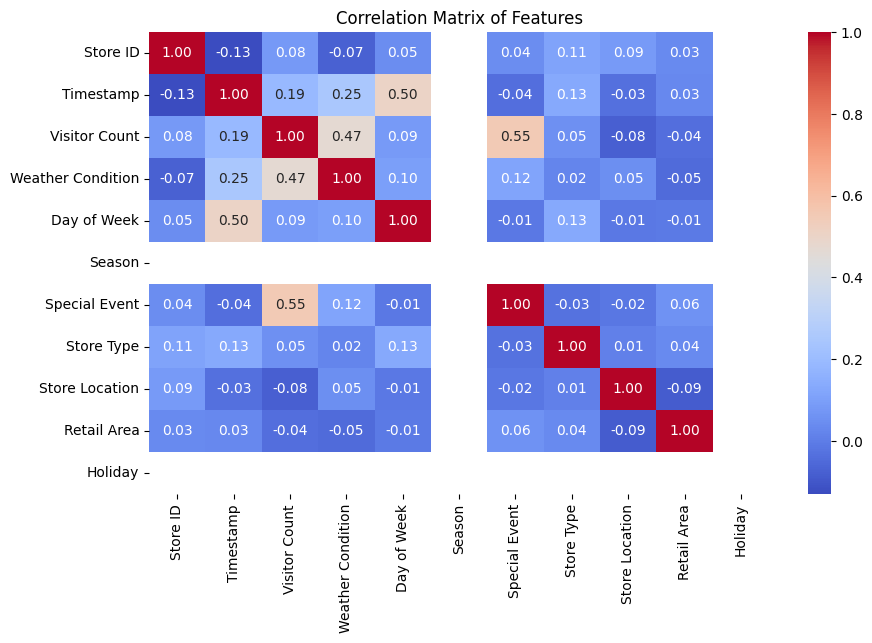

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = data_encoded.drop(columns=['Visitor Count', 'Timestamp', 'Store ID'])
y = data_encoded['Visitor Count']

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

RandomForestRegressor()

In [ ]:
df['Predicted Visitor Count'] = model.predict(X)

df[['Store ID', 'Visitor Count', 'Predicted Visitor Count']]

,Store ID,Visitor Count,Predicted Visitor Count
0,Store_3,48,40.840000
1,Store_8,80,78.350000
2,Store_4,57,58.460000
3,Store_19,32,38.790000
4,Store_3,25,30.580000
...,...,...,...
95,Store_8,45,50.340000
96,Store_19,65,55.320000
97,Store_11,31,40.290000
98,Store_12,71,75.703333


# **Conclusion**

The retail location analytics successfully predicts visitor traffic patterns using weather conditions, seasonal factors, and store characteristics. Through correlation analysis and Random Forest modeling, we identified key factors influencing foot traffic. The comparison between actual and predicted visitor counts provides valuable insights for optimizing store placement and operations. This data-driven approach helps retailers make informed decisions about store locations and resource allocation based on expected customer traffic patterns.